In [1]:
# загружаю библиотеки

import os
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sns

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Гипотеза:  
___Экономика государств с развитой государственной поддержкой инновационных предприятий (инновационной системы) растёт интенсивнее.___

Для этого, выбираю следующие показатели:  

___1.1.	Political environment (интегральный покозатель)___  
1.1.1.	Political stability and absence of violence/terrorism  
1.1.2.	Government effectiveness  
1.1.3.	Press freedom  

___1.2.	Regulatory environment (интегральный покозатель)___  
1.2.1.	Regulatory quality  
1.2.2.	Rule of law  
1.2.3.	Cost of redundancy dismissal  

___1.3.	Business environment (интегральный покозатель)___  
1.3.1.	Ease of starting a business  
1.3.2.	Ease of resolving insolvency  
1.3.3.	Ease of paying taxes  

2.1.1.	Expenditure on education  
2.1.2.	Public expenditure on education per pupil  

2.1.5.	Pupil-teacher ratio, secondary  

2.2.1.	Tertiary enrolment  
2.2.2.	Graduates in science and engineering  

2.3.1.	Researchers  
2.3.2.	Gross expenditure on R&D (GERD)  

3.1.3.	Government's online service  

3.2.1.	Electricity output  
3.2.3.	Logistics performance  

3.3.2.	Environmental performance  


___4.1.	Credit (интегральный покозатель)___  
4.1.1.	Ease of getting credit  
4.1.2.	Domestic credit to private sector  
4.1.3.	Microfinance institutions' gross loan portfolio  

4.2.1.	Ease of protecting investors  

4.2.4.	Venture capital deals  

4.3.2.	Market access for non-agricultural exports  
4.3.3.	Intensity of local competition  

5.1.2.	Firms offering formal training  

___5.2.	Innovation linkages (интегральный покозатель)___   
5.2.1.	University/industry research collaboration  
5.2.2.	State of cluster development  
5.2.3.	GERD financed by abroad  
5.2.4.	Joint venture/strategic alliance deals  
5.2.5.	Patent families filed in at least three offices  

5.3.1.	Royalties and license fees payments (% of service imports)  
5.3.4.	Foreign direct investment net inflows  

6.1.2.	Patent Cooperation Treaty resident applications  

6.3.4.	Foreign direct investment net outflows

Я выбрал 37 показателей, которые могут характеризовать государственную поддержку и 5 интегральных позателей (вероятно они могут быть полезны для свёртки)

# Исследование датасета

Построить графики:  
1) индекс gii по годам и регионам - кластеризация  
2) индекс gii по годам  
3) интегральные признаки по регионам  

In [2]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()
dataset

{'2013':        2013                                          Indicator  Albania  \
 8    1.1.1.  Political stability and absence of violence/te...     83.0   
 9    1.1.2.                           Government effectiveness     81.0   
 10   1.1.3.                                      Press freedom     81.0   
 12   1.2.1.                                 Regulatory quality     64.0   
 13   1.2.2.                                        Rule of law     93.0   
 14   1.2.3.                       Cost of redundancy dismissal     97.0   
 16   1.3.1.                        Ease of starting a business     23.0   
 17   1.3.2.                       Ease of resolving insolvency     59.0   
 18   1.3.3.                               Ease of paying taxes    114.0   
 21   2.1.1.                           Expenditure on education      0.0   
 22   2.1.2.          Public expenditure on education per pupil     89.0   
 25   2.1.5.                     Pupil-teacher ratio, secondary     72.0   
 27 

In [3]:
dataset['GII'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to region
Columns: 228 entries, Albania to Zimbabwe
dtypes: object(228)
memory usage: 14.3+ KB


In [69]:
dataset['GII'].T.describe()

,2013,2014,2015,2016,2017,2018,2019,region
count,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228
unique,143.0,143.0,143.0,142.0,141.0,142.0,147.0,22
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Caribbean
freq,86.0,82.0,82.0,82.0,82.0,82.0,82.0,24


## Индекс GII по годам и регионам

In [5]:
range_country = dataset['region']['region'].value_counts()
print(' Всего стран:',len(dataset['region'].index),  'В', len(range_country.index), 'регионах')

 Всего стран: 228 В 22 регионах


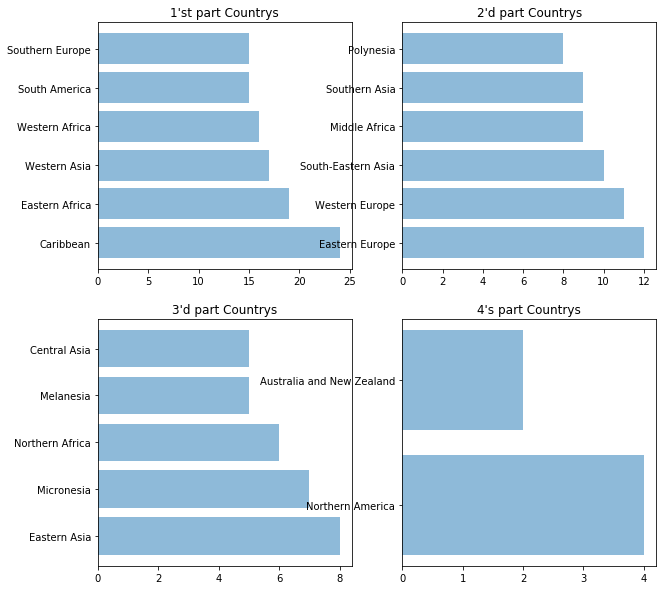

In [6]:
gridsize = (2, 2)
fig1, ax1 = plt.subplots(2,2, figsize = [10,10])
ax1 = ax1.flatten()

ax1[0] = plt.subplot2grid(gridsize, (0, 0))
ax1[0].barh(range_country.index[0:6], dataset['region']['region'].value_counts()[0:6], align='center', alpha=0.5)
ax1[0].set_title("1'st part Countrys")

ax1[1] = plt.subplot2grid(gridsize, (0, 1))
ax1[1].barh(range_country.index[7:13], dataset['region']['region'].value_counts()[7:13], align='center', alpha=0.5)
ax1[1].set_title("2'd part Countrys")

ax1[2] = plt.subplot2grid(gridsize, (1, 0))
ax1[2].barh(range_country.index[14:19], dataset['region']['region'].value_counts()[14:19], align='center', alpha=0.5)
ax1[2].set_title("3'd part Countrys")

ax1[3] = plt.subplot2grid(gridsize, (1, 1))
ax1[3].barh(range_country.index[20:22], dataset['region']['region'].value_counts()[20:22], align='center', alpha=0.5)
ax1[3].set_title("4's part Countrys")

plt.show()

In [7]:
reg_count = {}
reg_count = dataset['GII'].iloc[[7]].T['region'].value_counts()[:22]
reg_count

Caribbean                    24
Eastern Africa               19
Western Asia                 17
Western Africa               16
South America                15
Southern Europe              15
Northern Europe              13
Eastern Europe               12
Western Europe               11
South-Eastern Asia           10
Middle Africa                 9
Southern Asia                 9
Polynesia                     8
Central America               8
Eastern Asia                  8
Micronesia                    7
Northern Africa               6
Melanesia                     5
Central Asia                  5
Southern Africa               5
Northern America              4
Australia and New Zealand     2
Name: region, dtype: int64

In [8]:
#создаю датафраме с суммой gii по регионама и годам
ds_gii_sum = dataset['GII'].iloc[[0,7], :].T.groupby('region').sum().reset_index()
for i  in range(1,7):
    ds_gii_sum = ds_gii_sum.merge(dataset['GII'].iloc[[i,7], :].T.groupby('region').sum().reset_index(), how = 'left')
ds_gii_sum.fillna(0, inplace = True)
ds_gii_sum = ds_gii_sum.iloc[:22]
ds_gii_sum = ds_gii_sum.rename(index = ds_gii_sum['region'])
ds_gii_sum.drop('region', axis = 1, inplace = True)
ds_gii_sum.drop(2019, axis = 1, inplace = True)

#усреднение gii на 1 страну в реионе
for reg in ds_gii_sum.index:
    ds_gii_sum.loc[reg] /= reg_count[reg]
ds_gii_sum

,2013,2014,2015,2016,2017,2018
Australia and New Zealand,18.000000,17.500000,16.000000,18.000000,22.000000,21.000000
Caribbean,12.041667,12.333333,12.583333,12.097222,12.319444,12.736111
Central America,85.875000,89.500000,89.375000,86.750000,87.812500,89.312500
Central Asia,87.000000,91.200000,85.400000,78.333333,78.933333,79.333333
Eastern Africa,65.000000,71.105263,71.894737,65.333333,67.877193,67.256140
Eastern Asia,19.250000,16.500000,17.375000,15.125000,14.375000,13.625000
Eastern Europe,45.166667,43.500000,42.166667,42.583333,42.666667,41.583333
Melanesia,19.400000,19.000000,23.000000,20.466667,20.466667,20.466667
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Middle Africa,41.222222,40.000000,37.888889,39.888889,39.777778,39.111111


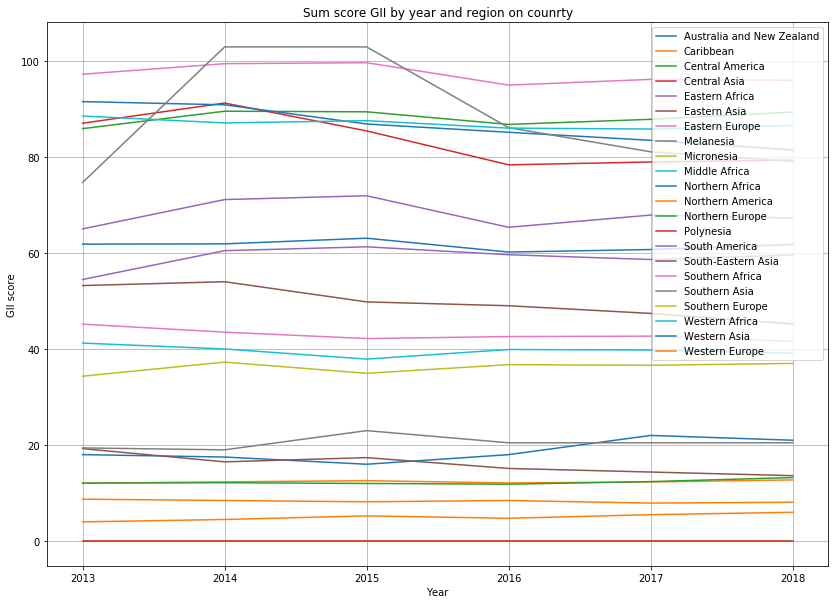

In [9]:
plt.figure(figsize = [14,10])
plt.title('Sum score GII by year and region on counrty')
plt.xlabel('Year')
plt.ylabel('GII score')
plt.grid(axis = 'both')
plt.plot(ds_gii_sum.T)
plt.legend(ds_gii_sum.index)
plt.show()

Text(0.5, 1.05, 'Correlation Matrix GII')

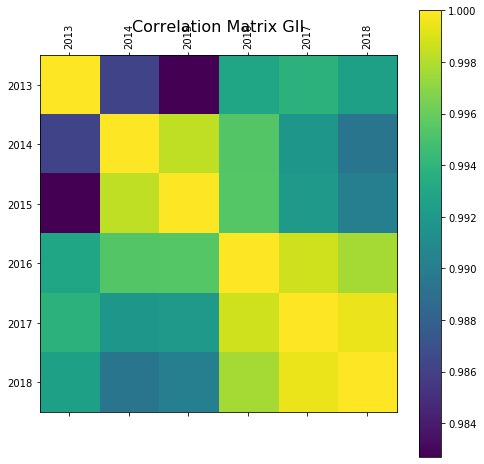

In [10]:
#матрица корреляции GII по годам
f = plt.figure(figsize=(8, 8))
plt.matshow(ds_gii_sum.corr(method ='pearson'), fignum=f.number)
plt.xticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10, rotation=90)
plt.yticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix GII', fontsize=16)

## Построение матриц кореляций

In [11]:
dataset['2017']#.iloc[:,2:]

,2017,Indicator,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,VietNam,Yemen,Zambia,Zimbabwe
8,1.1.1.,Political stability and absence of violence/te...,45.0,111.0,66.0,78.0,24.0,8.0,97.0,114.0,...,100.0,124.0,28.0,40.0,31.0,14.0,59.0,127.0,57.0,93.0
9,1.1.2.,Government effectiveness,69.0,95.0,77.0,79.0,15.0,19.0,84.0,41.0,...,94.0,96.0,16.0,13.0,20.0,42.0,68.0,127.0,98.0,124.0
11,1.2.1.,Regulatory quality,65.0,125.0,119.0,61.0,8.0,17.0,85.0,37.0,...,84.0,105.0,28.0,4.0,19.0,51.0,100.0,123.0,96.0,127.0
12,1.2.2.,Rule of law,82.0,112.0,111.0,80.0,13.0,10.0,97.0,45.0,...,79.0,110.0,37.0,14.0,18.0,38.0,74.0,126.0,73.0,127.0
13,1.2.3.,Cost of redundancy dismissal,87.0,71.0,117.0,38.0,43.0,1.0,90.0,1.0,...,22.0,47.0,1.0,27.0,1.0,86.0,101.0,110.0,124.0,102.0
15,1.3.1.,Ease of starting a business,39.0,106.0,115.0,9.0,7.0,85.0,5.0,60.0,...,117.0,18.0,45.0,15.0,44.0,51.0,92.0,116.0,80.0,127.0
16,1.3.2.,Ease of resolving insolvency,40.0,68.0,87.0,71.0,20.0,19.0,78.0,80.0,...,98.0,120.0,92.0,12.0,5.0,57.0,105.0,122.0,75.0,118.0
17,1.3.3.,Ease of paying taxes,73.0,108.0,122.0,67.0,23.0,37.0,35.0,4.0,...,61.0,66.0,1.0,10.0,32.0,82.0,115.0,70.0,49.0,112.0
20,2.1.1.,Expenditure on education,91.0,70.0,30.0,103.0,41.0,29.0,108.0,107.0,...,116.0,22.0,0.0,25.0,54.0,69.0,26.0,66.0,117.0,3.0
24,2.1.5.,"Pupil-teacher ratio, secondary",53.0,0.0,43.0,0.0,0.0,22.0,0.0,23.0,...,86.0,2.0,33.0,69.0,63.0,35.0,0.0,0.0,0.0,89.0


In [12]:
#создание корреляционных матриц для фич по годам
corr_matrix_fe = {}
for i in list(dataset.keys())[:7]:
    #corr_matrix_fe['_'.join(('corr', i))] = np.abs(dataset[i].iloc[:,2:].corr(method ='pearson')) #по модулю
    corr_matrix_fe['_'.join(('corr', i))] = dataset[i].iloc[:,2:].corr(method ='pearson')
corr_matrix_fe.keys()

dict_keys(['corr_2013', 'corr_2014', 'corr_2015', 'corr_2016', 'corr_2017', 'corr_2018', 'corr_2019'])

plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix_fe['corr_2013'], square = False, annot=True)
plt.show()

Text(0.5, 1.05, 'Correlation Matrix SubIndex 2013')

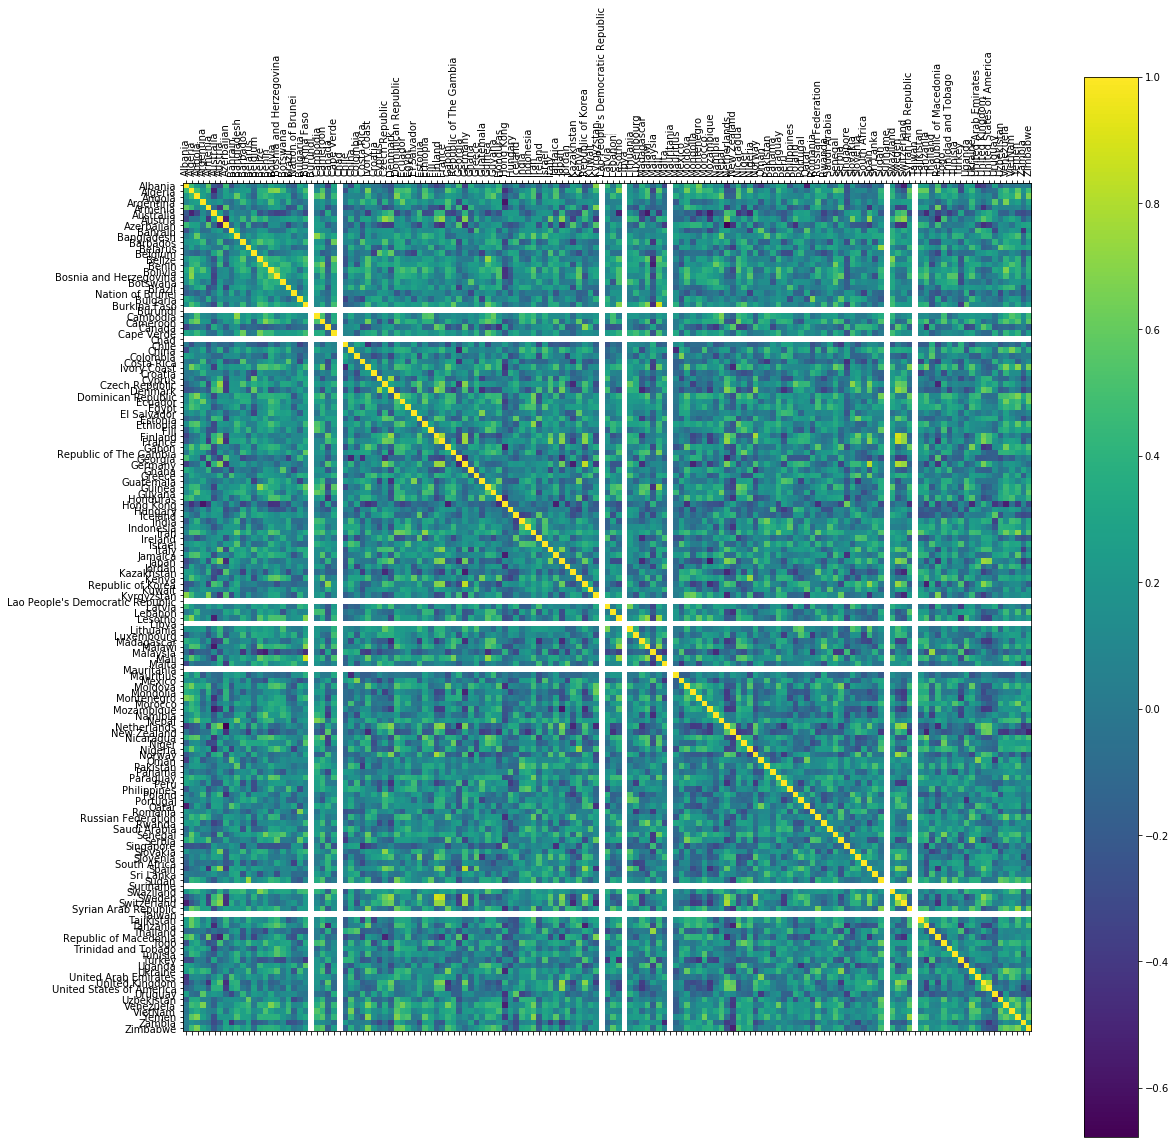

In [13]:
#корреляционаня матрица 2013
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2013'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2013', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix SubIndex 2014')

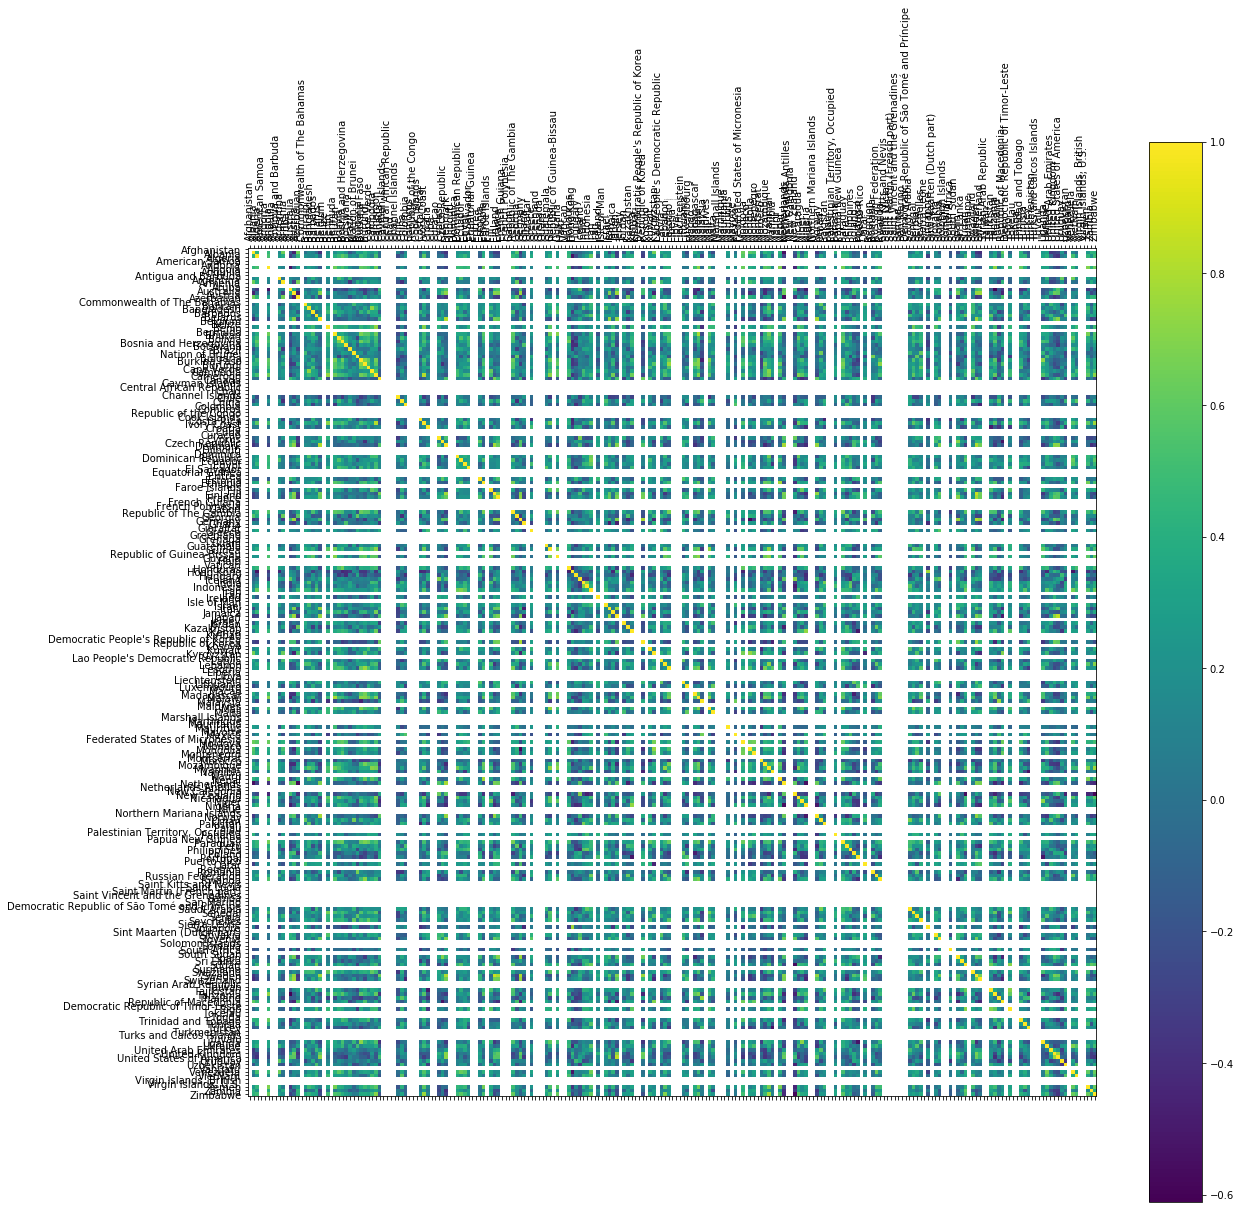

In [14]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2014'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2014', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix SubIndex 2015')

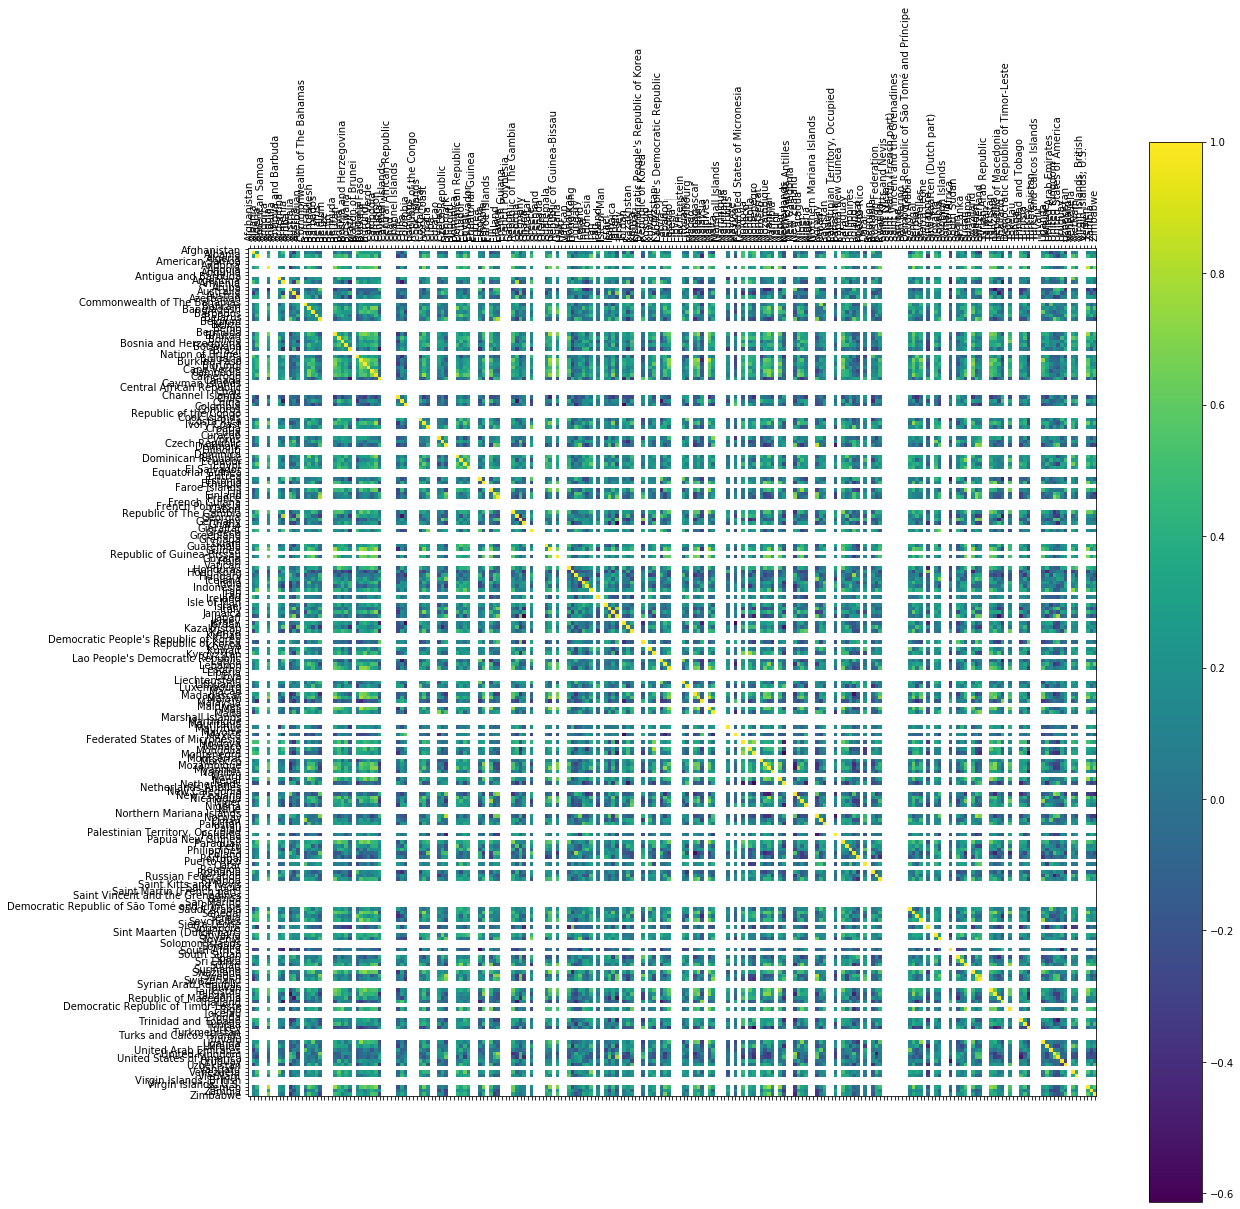

In [15]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2015'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2015', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix SubIndex 2016')

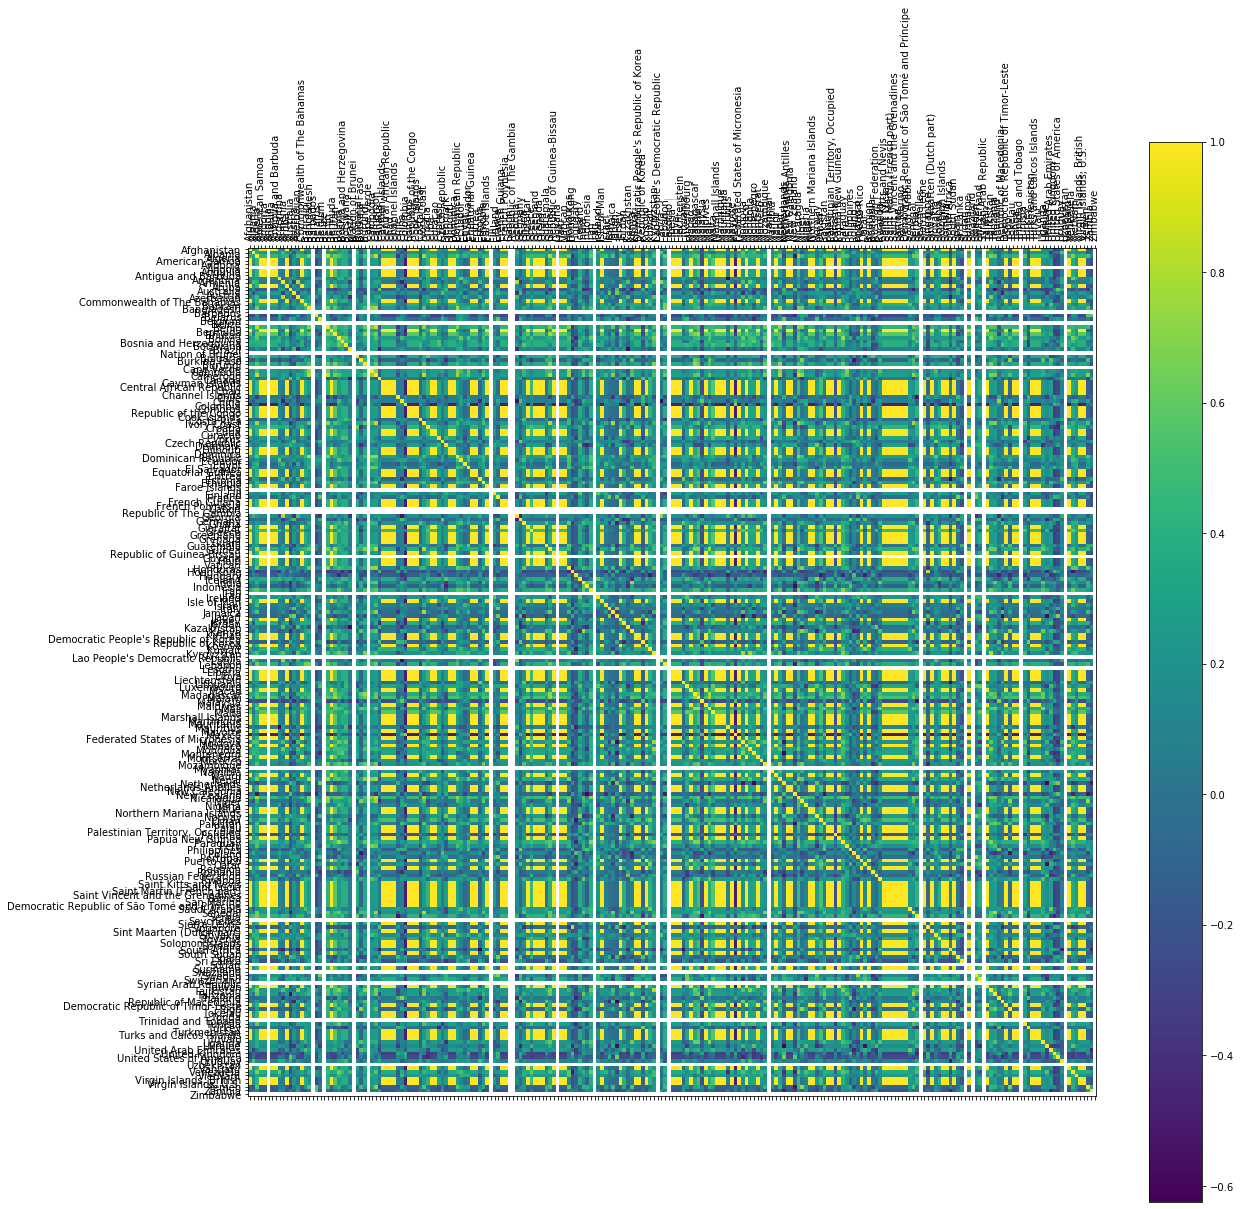

In [16]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2016'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2016', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix SubIndex 2017')

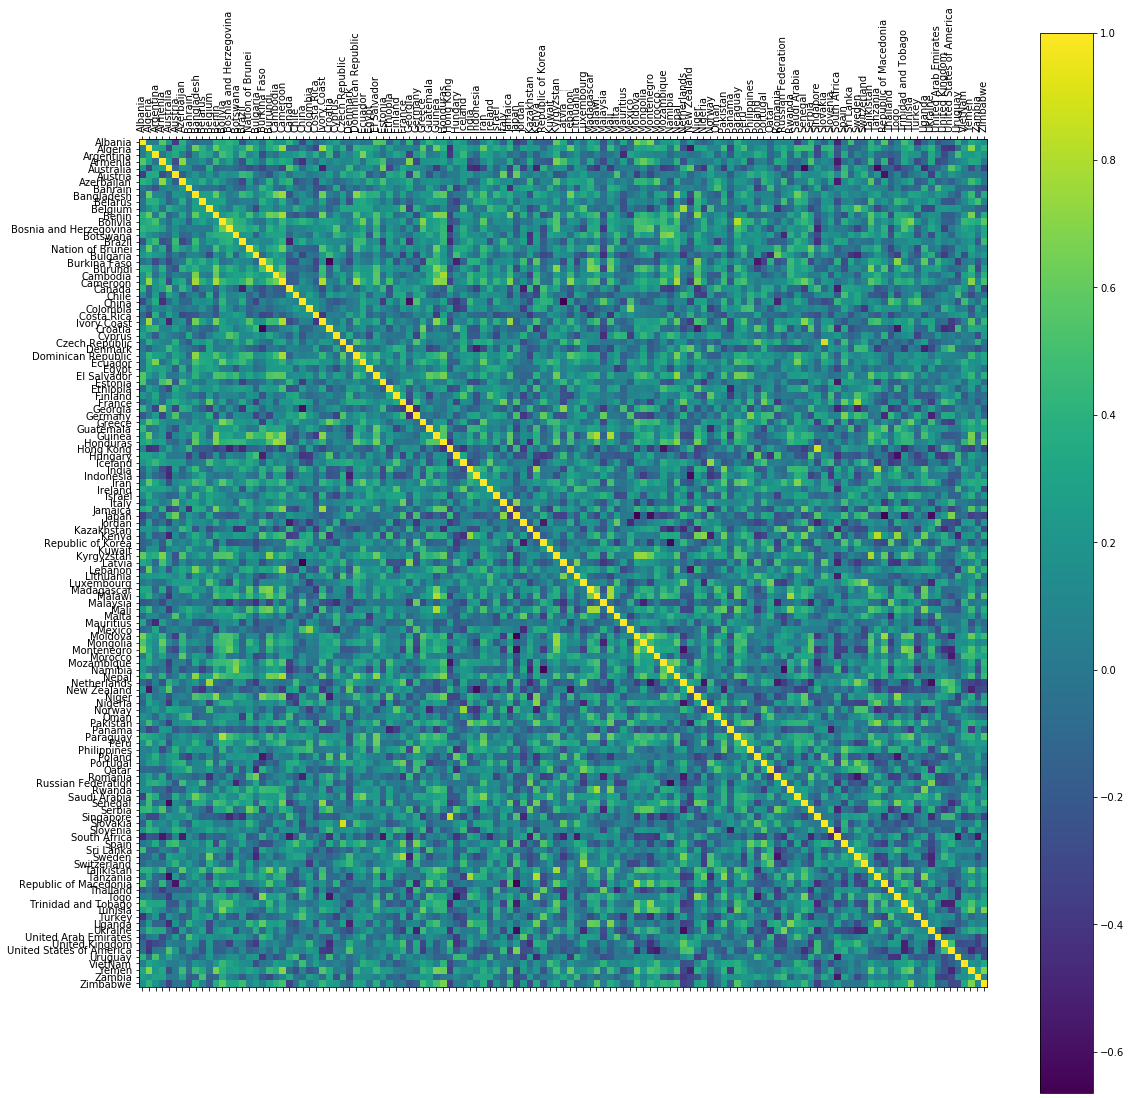

In [17]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2017'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2017', fontsize=0)

Text(0.5, 1.05, 'Correlation Matrix 2018')

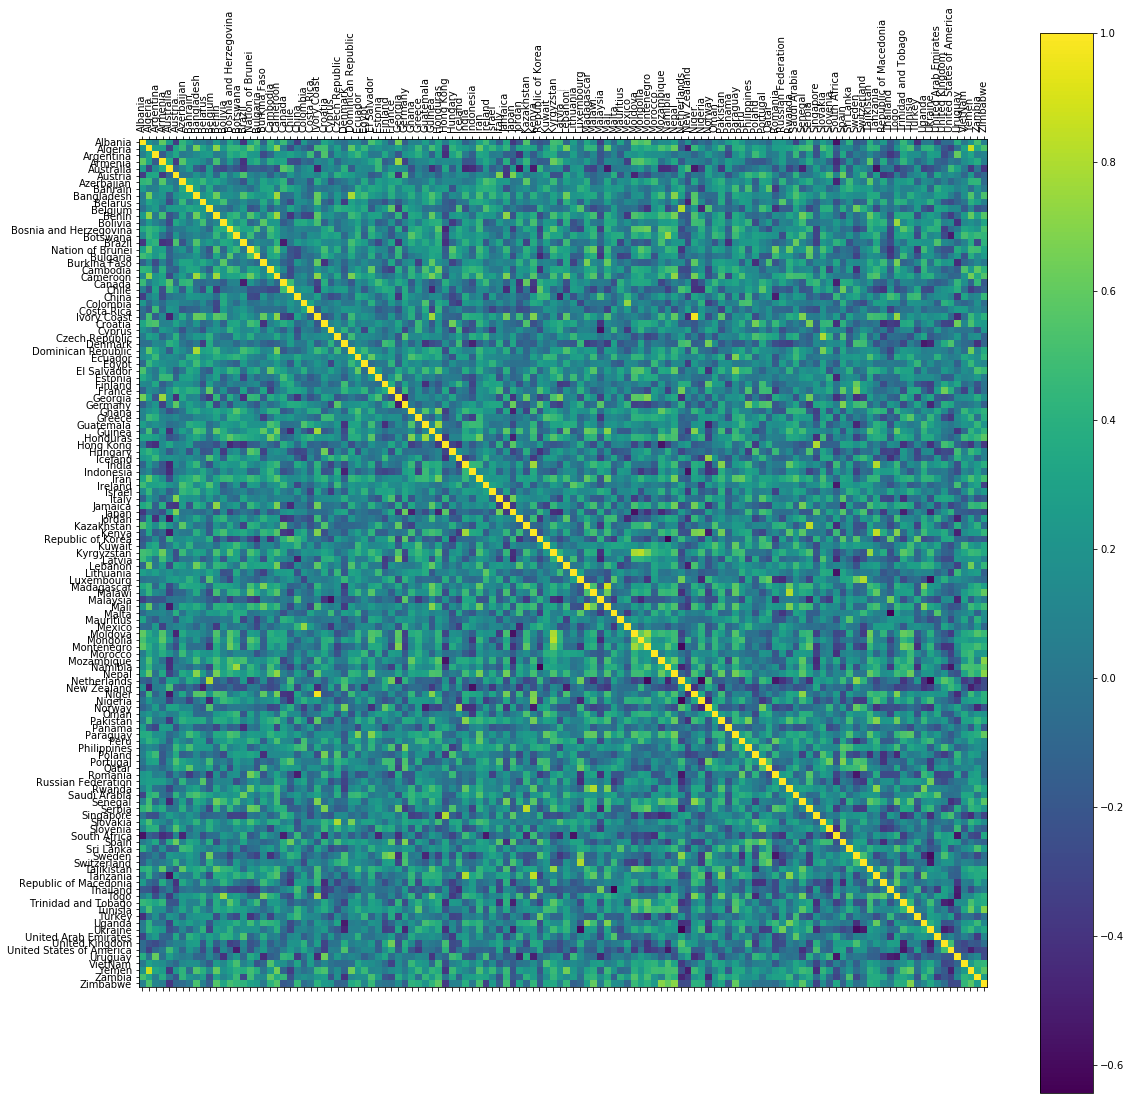

In [18]:
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2018'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix 2018', fontsize=0)

#поиск корреляционных матриц, где среднее значение столюца больше 0.5
for corr_m in corr_matrix_fe.keys():
    print(corr_m)
    for col in list(corr_matrix_fe[corr_m]):
        mean = corr_matrix_fe[corr_m][col].mean()
        if  mean > 0.4:
            print(mean)

import sys
sys.exit()

## Исследую интегральные показатели

In [19]:
dataset.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018', '2019', 'integr_fe', 'region', 'GII'])

In [21]:
integer_fe = dataset['integr_fe']
integer_fe.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [22]:
#подготавливаю датасет интегральных показателей: добавляю регион, удаляю не нужные столбцы
for i in integer_fe.keys():
    #переимменовываю индесы по столбцу 'Indicator'
    integer_fe[i] = integer_fe[i].rename(index = integer_fe[i]['Indicator'])
    
    # удаляю столюцы 'Indicator' и '201*'
    integer_fe[i].drop(['Indicator'], axis = 1, inplace = True)
    integer_fe[i].drop([list(integer_fe[i])[0]], axis = 1, inplace = True)

In [23]:
#добавляю регион
for df_name in integer_fe.keys():
    integer_fe[df_name] = integer_fe[df_name].append(pd.Series(None, name='region'))
    for i in list(dataset['region']['country']):
            try:
                integer_fe[df_name][i].region = list(dataset['region']['region'].loc[dataset['region']['country'] == i])[0]
            except: pass

D:\Program_Files\Anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [250]:
# pandas в некоторых датасетах не видит числа. Этот код преобразует object в числа
for ds in integer_fe.keys():
    integer_fe[ds].iloc[:4] = integer_fe[ds].iloc[:4].apply(pd.to_numeric, errors='coerce')

## Строю графики

In [24]:
integer_fe.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [282]:
#сумма integral fe по регионам и годам на 1 страну в регионе
sum_int_fe = {}
for ds in integer_fe.keys():
    group_intfe = integer_fe[ds].T.groupby('region').sum().reset_index()
    for fe in range(len(list(group_intfe)[1:])-1):
        ife = integer_fe[ds].iloc[[fe, 4]].T.groupby('region').sum().reset_index().iloc[:,1]
        cfe = integer_fe[ds].T.groupby('region').count().reset_index().iloc[:,1]
        group_intfe.iloc[:,fe + 1] = ife / cfe
    sum_int_fe[ds] = group_intfe    

In [301]:
sum_int_fe['int_fe_2013'].sort_values('Regulatory environment', ascending = False)[['region', 'Regulatory environment']]

,region,Regulatory environment
15,Southern Asia,120.666667
3,Central Asia,101.000000
2,Central America,90.250000
9,Northern Africa,88.333333
17,Western Africa,87.769231
12,South America,87.750000
4,Eastern Africa,84.583333
8,Middle Africa,82.500000
7,Melanesia,80.000000
13,South-Eastern Asia,77.888889


## Загружаю датасет со занчением Валого внутреннего продукта по странам с 2013 по 2019 гг.

In [363]:
data_dir = 'C:\\Users\\dserp\\ML\\Degree_ML\\GNI\\'
file_list = os.listdir(data_dir)
file_list

['GNI in mln US dol.csv', 'GNI in US_doll_per_capita.csv', 'GNI_full.csv']

In [364]:
gii_mln = pd.read_csv(os.path.join(data_dir, file_list[0]))
gii_mln.head(10)                    

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GNI,TOT,MLN_USD,A,2013,1.075721e+06,NaN
1,AUS,GNI,TOT,MLN_USD,A,2014,1.095631e+06,NaN
2,AUS,GNI,TOT,MLN_USD,A,2015,1.099954e+06,NaN
3,AUS,GNI,TOT,MLN_USD,A,2016,1.183348e+06,NaN
4,AUS,GNI,TOT,MLN_USD,A,2017,1.222598e+06,NaN
5,AUS,GNI,TOT,MLN_USD,A,2018,1.297755e+06,NaN
6,AUT,GNI,TOT,MLN_USD,A,2013,4.074664e+05,NaN
7,AUT,GNI,TOT,MLN_USD,A,2014,4.176093e+05,NaN
8,AUT,GNI,TOT,MLN_USD,A,2015,4.268470e+05,NaN
9,AUT,GNI,TOT,MLN_USD,A,2016,4.598048e+05,NaN


In [365]:
gii_mln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
LOCATION      299 non-null object
INDICATOR     299 non-null object
SUBJECT       299 non-null object
MEASURE       299 non-null object
FREQUENCY     299 non-null object
TIME          299 non-null int64
Value         299 non-null float64
Flag Codes    38 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 18.8+ KB


In [366]:
gii_mln.describe()

,TIME,Value
count,299.000000,2.990000e+02
mean,2015.548495,3.692931e+06
std,1.785519,8.604985e+06
min,2013.000000,3.469005e+04
25%,2014.000000,2.842534e+05
50%,2016.000000,5.562146e+05
75%,2017.000000,2.417803e+06
max,2019.000000,5.875921e+07


In [367]:
#удаляю лишние столбцы
gii_mln.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1, inplace = True)

#переименую столбцы
gii_mln.rename(columns = {'LOCATION' : 'country', 'TIME' : 'year', 'Value' : 'gni'}, inplace = True)

In [323]:
import pycountry

In [368]:
#код заменяет обозначение страны на её полное названиеи удаляет строку с не распознанной страной
unknow = list()
for i in range(len(gii_mln)):
    try:
        gii_mln['country'].iloc[i] = pycountry.countries.get(alpha_3= gii_mln['country'].iloc[i]).name     
    except: 
        gii_mln.drop(i)
        unknow.append(gii_mln.iloc[i])
gii_mln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
LOCATION    299 non-null object
TIME        299 non-null int64
Value       299 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB
